## Telecom Churn: Logistic Regression with PCA

With 21 predictor variables, we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, customer attrition is referred to as 'churn'.

### Importing and Merging Data

In [32]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
customer_data = pd.read_csv("customer_data.csv")
internet_data = pd.read_csv("internet_data.csv")

In [34]:
print(len(churn_data))
print(len(customer_data))
print(len(internet_data))

7043
7043
7043


In [35]:
#Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [36]:
#Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Let's understand the structure of our dataframe

In [37]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [38]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


### Data Preparation

In [39]:
# Converting Yes to 1 and No to 0
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes': 1, 'No': 0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})
telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})

### Dummy Variable Creation

In [40]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,cont],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

### Dropping the repeated variables

In [41]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [61]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] =telecom['TotalCharges'].apply(lambda x: float(x) if x != ' ' else 0.0 )
#telecom['tenure'] = telecom['tenure'].astype(int).astype(float)

In [63]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now we can see we have all variables as integer.

### Checking for Outliers

In [64]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [65]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147,2279.734304
std,24.559481,30.090047,0.368612,2266.794470
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,0.000000,398.550000
50%,29.000000,70.350000,0.000000,1394.550000
75%,55.000000,89.850000,0.000000,3786.600000
90%,69.000000,102.600000,1.000000,5973.690000
95%,72.000000,107.400000,1.000000,6921.025000
99%,72.000000,114.729000,1.000000,8039.256000


From the distribution shown above, you can see that there no outliner in your data. The numbers are gradually increasing.

### Checking for Missing Values and Inputing Them

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [66]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [67]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [68]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Feature Standardisation

In [69]:
# Normalising continuous features
df = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [70]:
normalized_df=(df-df.mean())/df.std()
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)
telecom = pd.concat([telecom,normalized_df],axis=1)
telecom.head()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.277354,-1.160241,-0.992540
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0.066323,-0.259611,-0.172152
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.236636,-0.362635,-0.957998
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.514215,-0.746482,-0.193659
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.236636,0.197351,-0.938808


### Checking the Churn Rate

In [71]:
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.536987079369588

We have almost 27% churn rate

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [72]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom.drop(['Churn','customerID'],axis=1)

# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [73]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Running Your First Training Model

In [74]:
import statsmodels.api as sm

In [75]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.0
Date:                Sun, 21 Mar 2021   Deviance:                       4016.1
Time:                        02:51:08   Pearson chi2:                 5.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.5563      1.182     -2.163      0.031      -4.873      -0.240
PhoneService                              0.4578      0.587      0.780      0.435      -0.692       1.608
PaperlessBilling                          0.3453      0.090      3.828      0.000       0.169       0.522
SeniorCitizen                             0.2950      0.103      2.877      0.004       0.094       0.496
Partner                                   0.0272      0.094      0.289      0.772      -0.157       0.212
Dependents                               -0.2207      0.108     -2.049      0.040      -0.432      -0.010
Contract_One year                        -0.6736      0.129     -5.205      0.000      -0.927      -0.420
Contract_Two year                        -1.3372      0.207     -6.452      0.000      -1.743      -0.931
PaymentMethod_Credit card (automatic)    -0.1531      0.138     -1.108      0.268      -0.424       0.118
PaymentMethod_Electronic check            0.2733      0.114      2.396      0.017       0.050       0.497
PaymentMethod_Mailed check               -0.0916      0.139     -0.660      0.509      -0.364       0.180
gender_Male                              -0.0411      0.078     -0.525      0.600      -0.195       0.112
MultipleLines_No                         -0.0480      0.204     -0.236      0.814      -0.447       0.351
MultipleLines_Yes                         0.5058      0.392      1.290      0.197      -0.263       1.274
InternetService_Fiber optic               2.0221      0.967      2.091      0.037       0.127       3.917
InternetService_No                       -2.6187      1.319     -1.985      0.047      -5.205      -0.033
OnlineSecurity_No                         0.0527      0.058      0.906      0.365      -0.061       0.167
OnlineSecurity_Yes                        0.0098      0.174      0.056      0.955      -0.331       0.351
OnlineBackup_No                           0.0415      0.054      0.766      0.444      -0.065       0.148
OnlineBackup_Yes                          0.0209      0.172      0.121      0.903      -0.317       0.358
DeviceProtection_No                      -0.0695      0.056     -1.249      0.212      -0.179       0.040
DeviceProtection_Yes                      0.1319      0.173      0.763      0.445      -0.207       0.471
TechSupport_No                            0.1581      0.059      2.665      0.008       0.042       0.274
TechSupport_Yes                          -0.0957      0.175     -0.546      0.585      -0.439       0.248
StreamingTV_No                           -0.3188      0.133     -2.399      0.016      -0.579      -0.058
StreamingTV_Yes                           0.3813      0.267      1.428      0.153      -0.142       0.905
Streaming

### Correlation Matrix

In [76]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

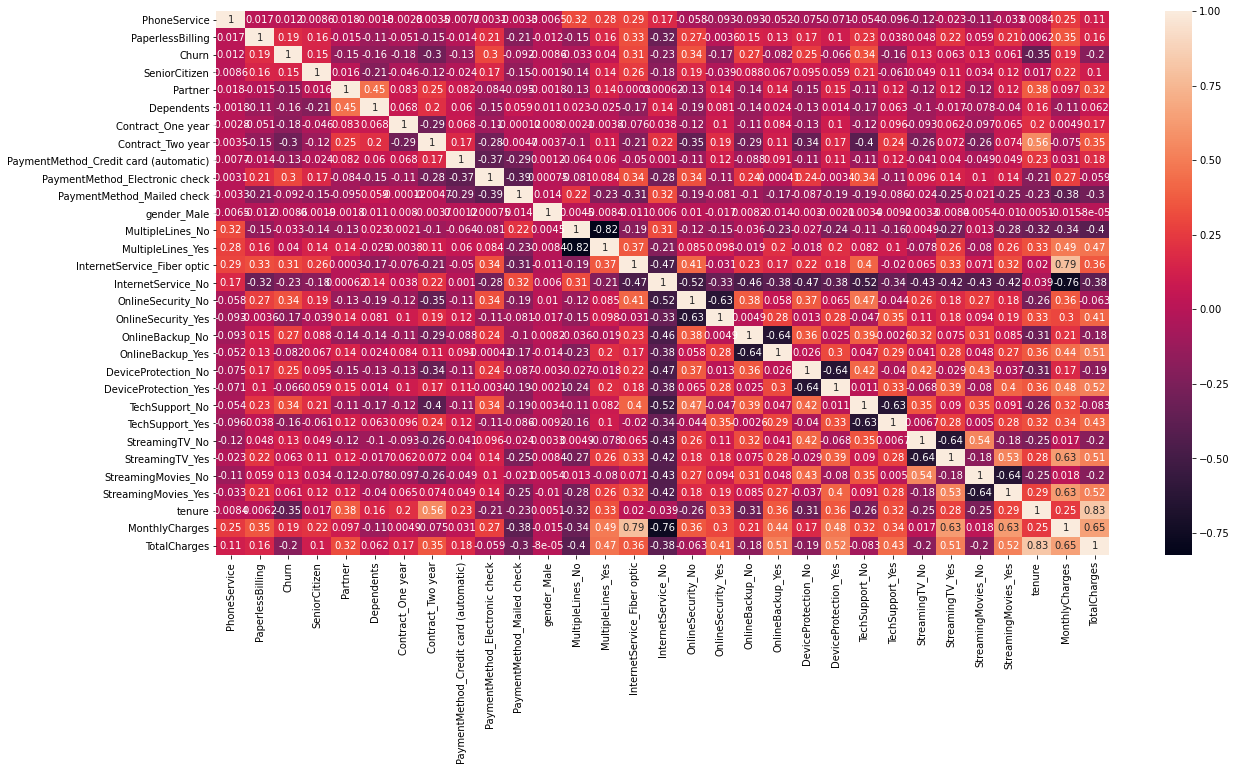

In [77]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)

### Dropping highly correlated variables.

In [78]:
X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

<AxesSubplot:>

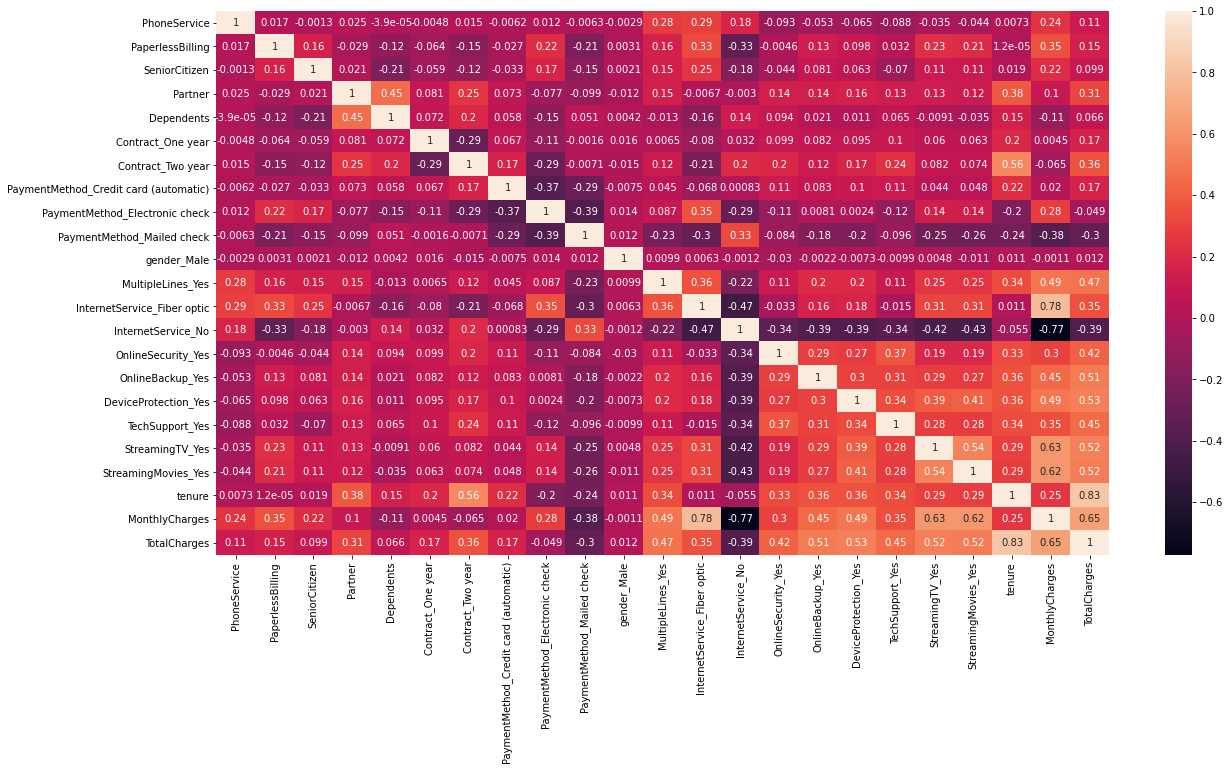

In [79]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

### Re-Running the Model

Now let's run our model again after dropping highly correlated variables

In [80]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.0
Date:                Sun, 21 Mar 2021   Deviance:                       4016.1
Time:                        02:51:27   Pearson chi2:                 5.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.9956      1.540     -1.945      0.052      -6.013       0.022
PhoneService                              0.4097      0.786      0.521      0.602      -1.131       1.950
PaperlessBilling                          0.3453      0.090      3.828      0.000       0.169       0.522
SeniorCitizen                             0.2950      0.103      2.877      0.004       0.094       0.496
Partner                                   0.0272      0.094      0.289      0.772      -0.157       0.212
Dependents                               -0.2207      0.108     -2.049      0.040      -0.432      -0.010
Contract_One year                        -0.6736      0.129     -5.205      0.000      -0.927      -0.420
Contract_Two year                        -1.3372      0.207     -6.452      0.000      -1.743      -0.931
PaymentMethod_Credit card (automatic)    -0.1531      0.138     -1.108      0.268      -0.424       0.118
PaymentMethod_Electronic check            0.2733      0.114      2.396      0.017       0.050       0.497
PaymentMethod_Mailed check               -0.0916      0.139     -0.660      0.509      -0.364       0.180
gender_Male                              -0.0411      0.078     -0.525      0.600      -0.195       0.112
MultipleLines_Yes                         0.5539      0.215      2.577      0.010       0.133       0.975
InternetService_Fiber optic               2.0221      0.967      2.091      0.037       0.127       3.917
InternetService_No                       -2.1794      0.977     -2.231      0.026      -4.094      -0.264
OnlineSecurity_Yes                       -0.0429      0.217     -0.198      0.843      -0.467       0.382
OnlineBackup_Yes                         -0.0206      0.211     -0.097      0.922      -0.435       0.394
DeviceProtection_Yes                      0.2014      0.213      0.944      0.345      -0.217       0.620
TechSupport_Yes                          -0.2538      0.219     -1.159      0.247      -0.683       0.175
StreamingTV_Yes                           0.7001      0.397      1.764      0.078      -0.078       1.478
StreamingMovies_Yes                       0.6689      0.396      1.688      0.091      -0.108       1.445
tenure                                   -1.3435      0.179     -7.500      0.000      -1.695      -0.992
MonthlyCharges                           -1.5285      1.158     -1.320      0.187      -3.799       0.742
TotalCharges                              0.6110      0.190      3.215      0.001       0.239       0.984
=========================================================================================================
"""

### Feature Selection Using RFE

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

/Users/alethea/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/alethea/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alethea/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO

[False  True False False False  True  True False  True False False  True
 False  True  True  True False False False False False False False False
  True False  True  True  True  True]
[ 5  1  3 18  4  1  1 11  1 12 17  1 16  1  1  1  7  6 15  9 10  2  8 14
  1 13  1  1  1  1]


In [88]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [89]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train, y_train)

LogisticRegression(C=1000000000.0)

In [90]:
#Comparing the model with StatsModels
#logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.0
Date:                Sun, 21 Mar 2021   Deviance:                       4016.1
Time:                        02:51:44   Pearson chi2:                 5.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.5563      1.182     -2.163      0.031      -4.873      -0.240
PhoneService                              0.4578      0.587      0.780      0.435      -0.692       1.608
PaperlessBilling                          0.3453      0.090      3.828      0.000       0.169       0.522
SeniorCitizen                             0.2950      0.103      2.877      0.004       0.094       0.496
Partner                                   0.0272      0.094      0.289      0.772      -0.157       0.212
Dependents                               -0.2207      0.108     -2.049      0.040      -0.432      -0.010
Contract_One year                        -0.6736      0.129     -5.205      0.000      -0.927      -0.420
Contract_Two year                        -1.3372      0.207     -6.452      0.000      -1.743      -0.931
PaymentMethod_Credit card (automatic)    -0.1531      0.138     -1.108      0.268      -0.424       0.118
PaymentMethod_Electronic check            0.2733      0.114      2.396      0.017       0.050       0.497
PaymentMethod_Mailed check               -0.0916      0.139     -0.660      0.509      -0.364       0.180
gender_Male                              -0.0411      0.078     -0.525      0.600      -0.195       0.112
MultipleLines_No                         -0.0480      0.204     -0.236      0.814      -0.447       0.351
MultipleLines_Yes                         0.5058      0.392      1.290      0.197      -0.263       1.274
InternetService_Fiber optic               2.0221      0.967      2.091      0.037       0.127       3.917
InternetService_No                       -2.6187      1.319     -1.985      0.047      -5.205      -0.033
OnlineSecurity_No                         0.0527      0.058      0.906      0.365      -0.061       0.167
OnlineSecurity_Yes                        0.0098      0.174      0.056      0.955      -0.331       0.351
OnlineBackup_No                           0.0415      0.054      0.766      0.444      -0.065       0.148
OnlineBackup_Yes                          0.0209      0.172      0.121      0.903      -0.317       0.358
DeviceProtection_No                      -0.0695      0.056     -1.249      0.212      -0.179       0.040
DeviceProtection_Yes                      0.1319      0.173      0.763      0.445      -0.207       0.471
TechSupport_No                            0.1581      0.059      2.665      0.008       0.042       0.274
TechSupport_Yes                          -0.0957      0.175     -0.546      0.585      -0.439       0.248
StreamingTV_No                           -0.3188      0.133     -2.399      0.016      -0.579      -0.058
StreamingTV_Yes                           0.3813      0.267      1.428      0.153      -0.142       0.905
Streaming

In [91]:
X_test[col].shape
#res = modres.predict(X_test[col])

(2113, 13)

### Making Predictions

In [92]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.005204
1,0.001912
2,0.014071
3,0.005385
4,0.149940


In [93]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
4880,0
1541,0
1289,0
5745,0
4873,0


In [95]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,0,0,0.005204
1,1,0,0.001912
2,2,0,0.014071
3,3,0,0.005385
4,4,0,0.149940


In [96]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,0,0,0.005204,0
1,1,0,0.001912,0
2,2,0,0.014071,0
3,3,0,0.005385,0
4,4,0,0.149940,0


### Model Evaluation

In [97]:
from sklearn import metrics

In [98]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1369,  178],
       [ 265,  301]])

In [99]:
# Predicted     Churn  not_churn  __all__
# Actual
# Churn            1359   169     1528
# not_churn         256   326      582
# __all__          1615   751     2110

In [100]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

0.7903454803596782

In [101]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

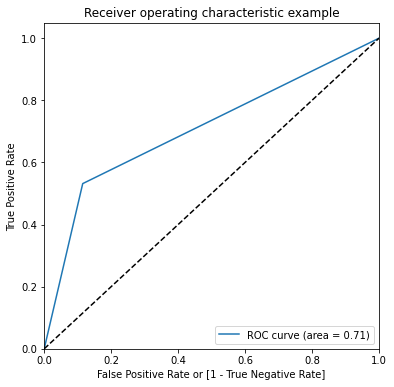

(array([0.        , 0.11506141, 1.        ]),
 array([0.        , 0.53180212, 1.        ]),
 array([2, 1, 0]))

In [102]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

In [103]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Churn, y_pred_final.Churn_Prob))

'0.83'

#### We see an overall AUC score of 0.83 looks like we did a decent job.
- But we did spend a lot of effort on the features and their selection.
- Can PCA help reduce our effort?

### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [104]:
X_train.shape

(4930, 30)

In [105]:
from sklearn.decomposition import PCA

In [122]:
pca = PCA(random_state=42)

In [123]:
%%time
pca.fit(X_train)

CPU times: user 13.3 ms, sys: 2.43 ms, total: 15.7 ms
Wall time: 12.8 ms


PCA(random_state=42)

#### Components from the PCA

In [124]:
pca.components_

array([[ 1.84259755e-02,  6.83211035e-02,  3.24596755e-02,
         9.42153711e-02,  1.21136143e-02,  3.16367900e-02,
         7.88016996e-02,  3.92877370e-02,  1.30735405e-02,
        -9.71150235e-02,  1.64050660e-03, -1.42258448e-01,
         1.60684423e-01,  1.36235794e-01, -1.27261914e-01,
         1.52803897e-02,  1.11981524e-01, -2.58759766e-02,
         1.53137891e-01, -3.62400543e-02,  1.63501968e-01,
         1.98598141e-03,  1.25275933e-01, -5.10910395e-02,
         1.78352954e-01, -5.05718261e-02,  1.77833740e-01,
         4.47919458e-01,  4.68673847e-01,  5.62331046e-01],
       [-1.15340784e-02, -1.51501670e-01, -7.24087294e-02,
         1.10712817e-01,  1.13085361e-01,  5.58056869e-02,
         1.99919120e-01,  6.61015405e-02, -1.97713757e-01,
         7.40842518e-02, -1.89074742e-03,  3.67963537e-02,
        -4.83304322e-02, -2.52747104e-01,  2.30613235e-01,
        -2.77811867e-01,  4.71986323e-02, -2.30186976e-01,
        -4.26258901e-04, -2.31708435e-01,  1.09520069e-

Looking at the explained variance ratio for each component

In [125]:
pca.explained_variance_ratio_

array([3.28497124e-01, 1.76861492e-01, 5.95003624e-02, 4.56542186e-02,
       3.68138749e-02, 3.38959488e-02, 3.32045238e-02, 3.11075389e-02,
       2.94333481e-02, 2.83681701e-02, 2.75735682e-02, 2.49320674e-02,
       2.44902668e-02, 2.36987211e-02, 2.21802257e-02, 2.09249937e-02,
       1.53727230e-02, 1.09947329e-02, 8.37899913e-03, 7.22858478e-03,
       5.87052126e-03, 4.97111684e-03, 4.68770624e-05, 2.31821832e-31,
       6.31439701e-32, 3.45631982e-33, 2.56112160e-33, 2.49780202e-33,
       2.13122643e-33, 1.25287555e-33])

Making a scree plot for the explained variance

In [126]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

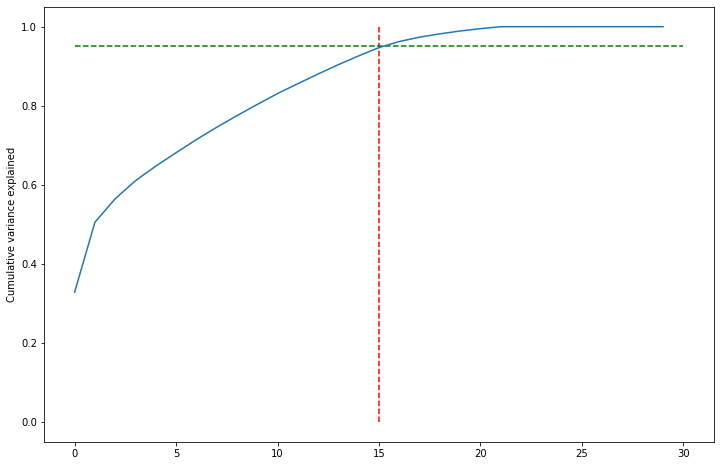

In [127]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 16 components

In [128]:
from sklearn.decomposition import IncrementalPCA

In [129]:
pca_final = IncrementalPCA(n_components=16)

In [130]:
%%time
df_train_pca = pca_final.fit_transform(X_train)

CPU times: user 100 ms, sys: 5.45 ms, total: 106 ms
Wall time: 72.9 ms


In [131]:
df_train_pca.shape

(4930, 16)

In [132]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [133]:
corrmat.shape

(16, 16)

Plotting the heatmap of the corr matrix

<AxesSubplot:>

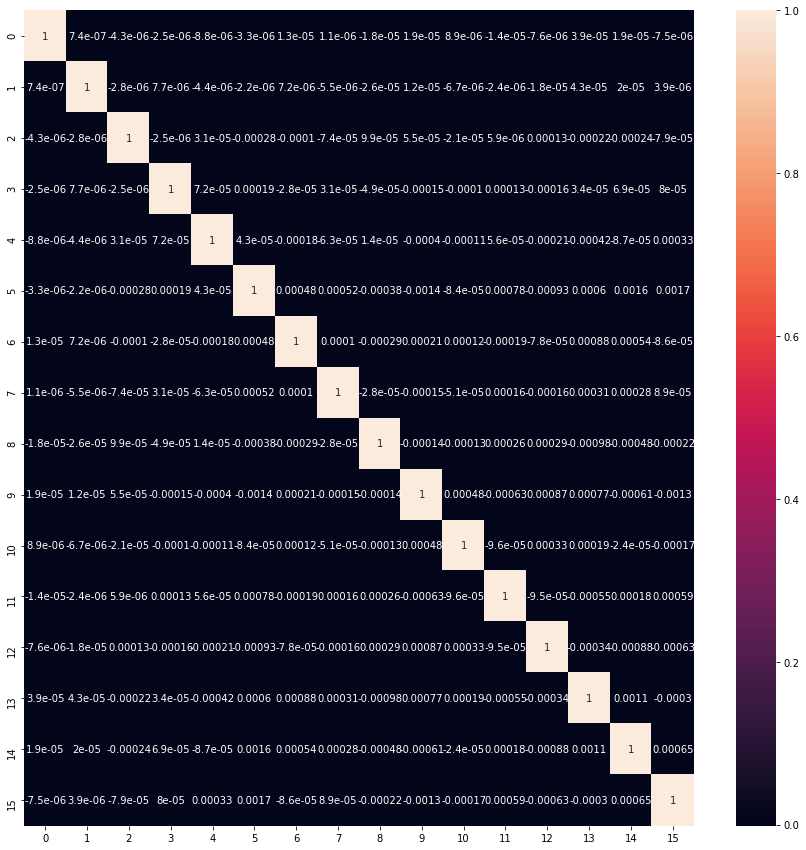

In [134]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [135]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2113, 16)

### Applying logistic regression on the data on our Principal components

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
learner_pca = LogisticRegression()

In [138]:
model_pca = learner_pca.fit(df_train_pca, y_train)

Making predictions on the test set

In [139]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [140]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.82'

#### Making it a little more unsupervised 

In [159]:
pca_again = PCA(0.9)

In [160]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [161]:
df_train_pca2.shape

(4930, 14)

Following it up with a logistic regression model

In [162]:
learner_pca2 = LogisticRegression()

In [163]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [164]:
df_test_pca2 = pca_again.transform(X_test)

In [165]:
df_test_pca2.shape

(2113, 14)

In [166]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [167]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.82'

PCA is great!